In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("Customer Churn.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
#Replcing blanks with 0 as tenure is 0 and no total charges are recorded

# converted -> "TotalCharges"]=df["TotalCharges"].replace(" float")

In [11]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0.00")

In [13]:
df["TotalCharges"]=df["TotalCharges"].astype("float")


In [21]:
df.isnull().sum().sum()

0

In [23]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [29]:
df["customerID"].duplicated().sum()

0

In [41]:
# we have converted 0 and 1 values of senior citizen to yes/no to make ir easier to understand

def convert(value):
    if value ==1 :
        return "yes"
    else :
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(convert)

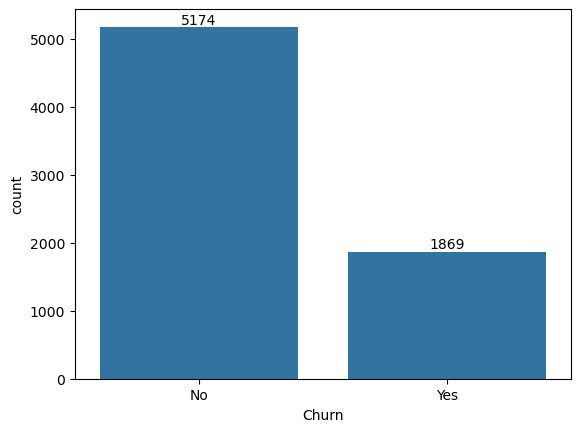

In [60]:
ax = sb.countplot(x='Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by churn")
plt.show()


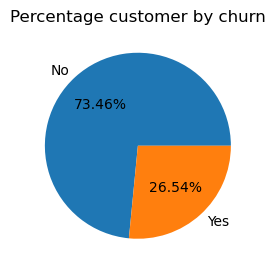

In [92]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct ="%1.2f%%")
plt.title("Percentage Customer by Churn")
plt.show()


In [ ]:
# From given pie chart we can conclude that 26.54 % customer have churned out 
#Now Let's explore reasons behind it 

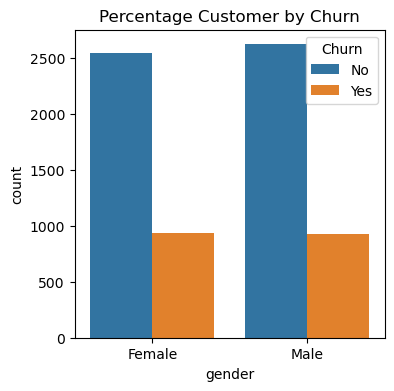

In [114]:
plt.figure(figsize=(4,4))
sb.countplot(x= "gender", data=df,hue="Churn")
plt.title("Percentage Customer by Churn")
plt.show()

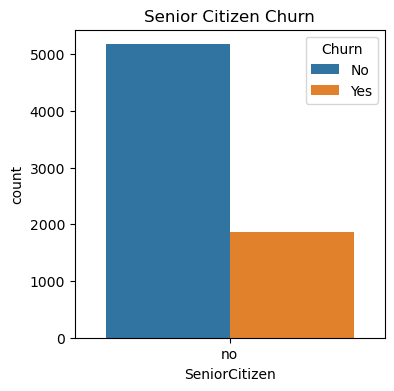

In [118]:
plt.figure(figsize=(4,4))
sb.countplot(x= "SeniorCitizen", data=df,hue="Churn")
plt.title("Senior Citizen Churn")
plt.show()

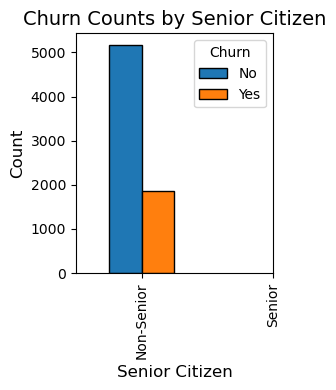

In [135]:
# Calculate churn counts
churn_counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()

# Plot
churn_counts.plot(
    kind="bar",
    figsize=(3, 4),
    color=["#1f77b4", "#ff7f0e"],
    edgecolor="black"
)

# Customize the plot
plt.title("Churn Counts by Senior Citizen", fontsize=14)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Senior", "Senior"], fontsize=10)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


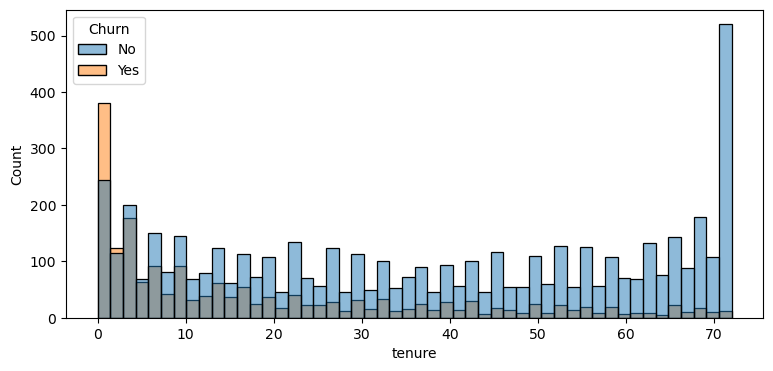

In [139]:
plt.figure(figsize=(9,4))
sb.histplot(x="tenure",data=df,bins=50,hue="Churn")
plt.show()

#People who have used services for the long month stayed
# People who used services for short duration churned

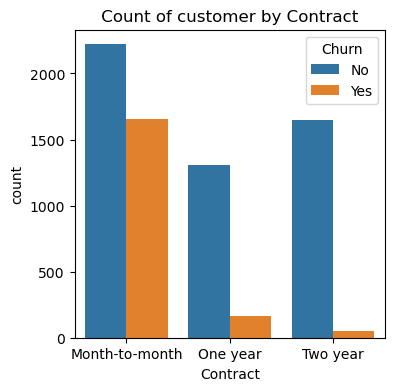

In [145]:
plt.figure(figsize=(4,4))
sb.countplot(x= "Contract", data=df,hue="Churn")
plt.title(" Count of customer by Contract ")
plt.show()

#People who have month to month to contract are likly to churn then those 
#who have one or 2 years of contact

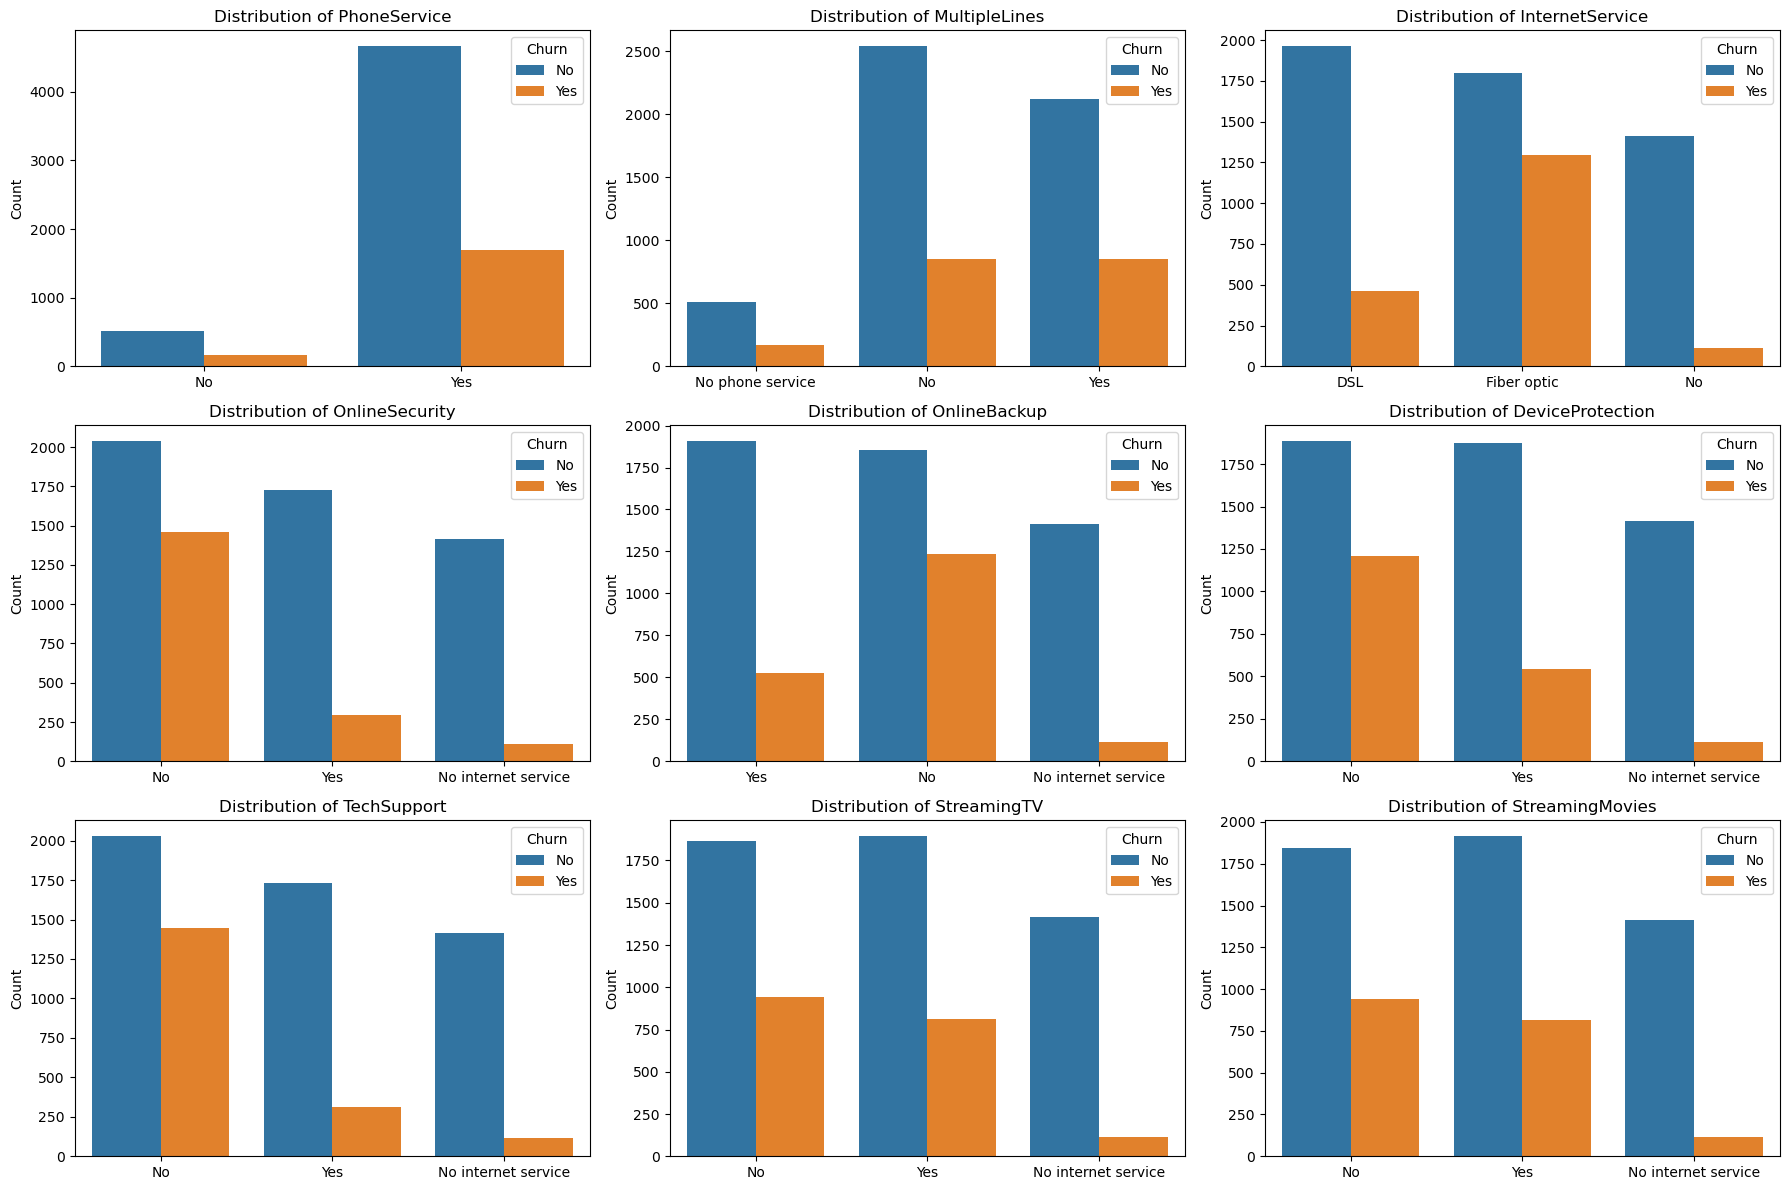

In [159]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots
n_cols = 3  # Number of plots per row
n_rows = -(-len(columns) // n_cols)  # Calculate rows (ceiling division)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through columns and create a count plot for each
for i, col in enumerate(columns):
    sb.countplot(x=col, data=df, ax=axes[i],hue= df["Churn"])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Summary of Count Plots

This set of count plots highlights the relationship between various services (e.g., PhoneService, InternetService, OnlineSecurity) and customer churn. Key insights include:

- **PhoneService and MultipleLines**: Customers with these services show lower churn.
- **InternetService**: Fiber optic users exhibit higher churn compared to DSL or no internet.
- **Optional Services (OnlineSecurity, TechSupport, etc.)**: Customers lacking these services tend to have higher churn rates.

In general, lacking additional services like security and support increases the likelihood of churn.


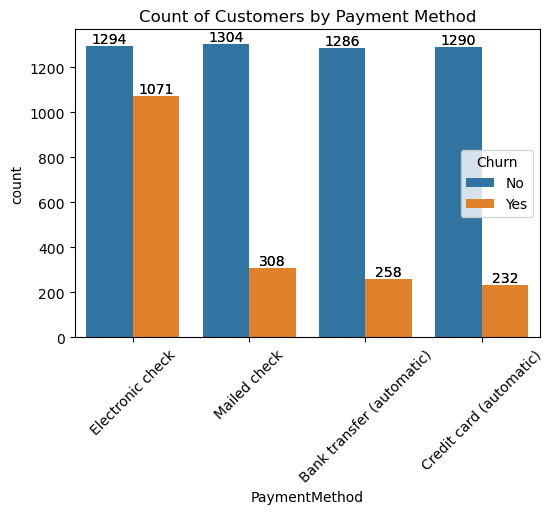

In [193]:
plt.figure(figsize=(6, 4))
ax = sb.countplot(x="PaymentMethod", data=df, hue="Churn")

# Add bar labels
for container in ax.containers:
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.xticks(rotation=45)

# Set title and display plot
plt.title("Count of Customers by Payment Method")
plt.show()

In [ ]:
#c